# OTIMIZAÇÃO DAS DESPESAS COM MARKETING

O seguinte trabalho tem como objetivo dar soluções de como podemos traçar melhores estratégias com o nosso marketing dado o nosso estado atual.
Portanto primeiro precisamos compreender qual o nosso estado atual, e depois estabelecermos as ações 

In [29]:
#importando bibliotecas

import pandas as pd                            #pandas==2.2.2
import numpy as np                             #numpy==1.26.4       
from matplotlib import pyplot as plt           #matplotlib==3.8.4

In [18]:
#Aqui estarão escritas todas as funções que serão utilizadas no código principal

def snake_case(df):
    """
    Função que transforma o nome das colunas de um DataFrame em snake_case
    """
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    return df

In [19]:
#primeira vista do primeiro df

df = pd.read_csv('datasets/visits_log_us.csv', nrows=100)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Device     100 non-null    object
 1   End Ts     100 non-null    object
 2   Source Id  100 non-null    int64 
 3   Start Ts   100 non-null    object
 4   Uid        100 non-null    uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 4.0+ KB
None


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


### visits

O primeiro df vai nos mostrar os acessos ao site. Ele nos responde quem é o usuário, como que entrou, quando e a origem do anúncio que o trouxe.
Devemos:

    1- Converter as colunas de data para datetime, que será fundamental para analisarmos esses dados
    2 - Converter para category os dados em "device".
    3 - Seguir as normas que exigem o snake_case. No caso todas as colunas renomeadas em minúsculas e com underline.

O nome do df será visits

In [20]:
print(df['Device'].value_counts())

Device
desktop    73
touch      27
Name: count, dtype: int64


In [21]:
visits = pd.read_csv('datasets/visits_log_us.csv', dtype={'Device':'category'}, parse_dates=['End Ts','Start Ts'])
visits = snake_case(visits)
print(visits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB
None


Não há valores nulos em <span style="color: red;">visits</span>.

In [22]:
#lendo o segundo dataset

df = pd.read_csv('datasets/orders_log_us.csv', nrows=100)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   100 non-null    object 
 1   Revenue  100 non-null    float64
 2   Uid      100 non-null    uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 2.5+ KB
None


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


### orders

O segundo df identifica valor e hora de cada pedido
Vamos fazer as mesmas configurações de visits:

    1 - Aplicar snake_case em todas as colunas;
    2 - converter para datetime "Buy Ts".

O df irá chamar orders.

In [23]:
orders = pd.read_csv('datasets/orders_log_us.csv', parse_dates=['Buy Ts'])
orders = snake_case(orders)
print(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
None


Não há valores nulos em <span style="color: red;">orders</span>.

In [24]:
#lendo o terceiro dataset
df = pd.read_csv('datasets/costs_us.csv', nrows=100)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  100 non-null    int64  
 1   dt         100 non-null    object 
 2   costs      100 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ KB
None


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


### costs

O ultimo df já tem as colunas configuradas, a unica alteração é a configuração da coluna dt que será convertido para datetime.

In [25]:
costs = pd.read_csv('datasets/costs_us.csv', parse_dates=['dt'])
print(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB
None


Não há valores nulos em <span style="color: red;">costs</span>.

Agora com os dfs configurados podemos partir para analisar os dados deles mais de perto para conseguir avaliar qual o estado atual da empresa.


## Processando os dados da empresa

O roteiro para o processamento e compreensão dos dados da empresa será:

    1 - Produto: o que podemos avaliar sobre o uso do produto?
    2 - Vendas: qual a situação das vendas da empresa?
    3 - Marketing: o que podemos inferir sobre o marketing da empresa?




#### Produto:

In [41]:
visits['day'] = visits['start_ts'].dt.date
visits['week'] = visits['start_ts'].dt.isocalendar().week
visits['month'] = visits['start_ts'].dt.month

visits['total_session'] = visits['end_ts'] - visits['start_ts']
visits['total_session'] = visits['total_session'].dt.seconds / 60
print(visits.head())

print("\n\n")
print(f'O df corresponde aos acessos desde o dia {visits['day'].min()} até o dia {visits['day'].max()}')



    device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid         day  week  month  total_session  
0  16879256277535980062  2017-12-20    51     12           18.0  
1    104060357244891740  2018-02-19     8      2           28.0  
2   7459035603376831527  2017-07-01    26      7            0.0  
3  16174680259334210214  2018-05-20    20      5           24.0  
4   9969694820036681168  2017-12-27    52     12            0.0  



O df corresponde aos acessos desde o dia 2017-06-01 até o dia 2018-05-31
364 days, 0:00:00


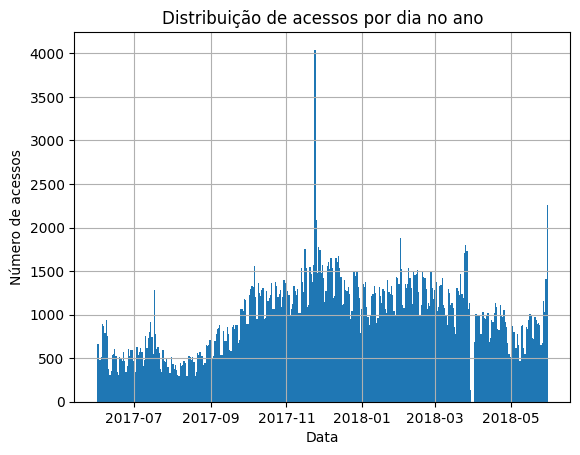

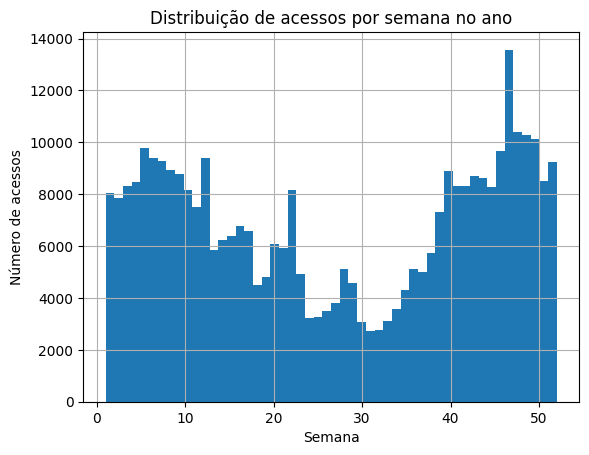

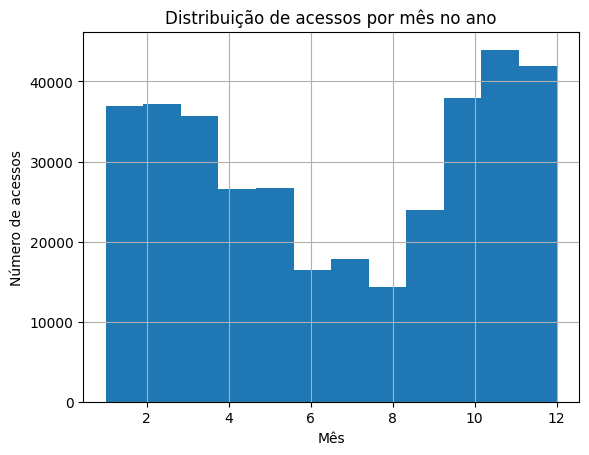

In [58]:

visits['day'].hist(bins=365)
plt.title('Distribuição de acessos por dia no ano')
plt.xlabel('Data')
plt.ylabel('Número de acessos')
plt.show()

visits['week'].hist(bins=52)
plt.title('Distribuição de acessos por semana no ano')
plt.xlabel('Semana')
plt.ylabel('Número de acessos')
plt.show()

visits['month'].hist(bins=12)
plt.title('Distribuição de acessos por mês no ano')
plt.xlabel('Mês')
plt.ylabel('Número de acessos')
plt.show()

É interessante notar que talvez haja um padrão entre os dias da semana na frequencia que vale a pena avaliar.

Além disso podemos ver que entre os meses de outubro e abril existe um maior numero de acessos. Com pico por volta do fim de novembro.

Talvez por conta da black friday? é uma hipotese que pode ser testada já que a black friday em 2017 caiu no dia 24 de novembro.

No fim de março ou inicio de Abril o site teve uma queda de acessos, é provável que tenha sido uma queda no servidor.

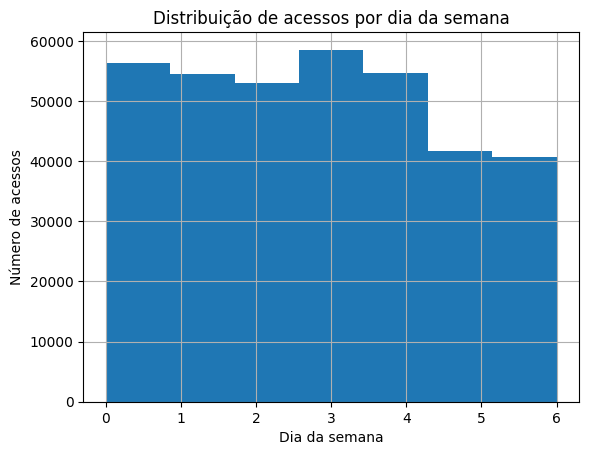

In [48]:
day_of_week = visits
day_of_week['day_of_week'] = day_of_week['start_ts'].dt.dayofweek
day_of_week['day_of_week'].hist(bins=7)
plt.title('Distribuição de acessos por dia da semana')
plt.xlabel('Dia da semana')
plt.ylabel('Número de acessos')
plt.show()

Podemos concluir que a hipótese que os acessos tinham um padrão semanal está confirmada.
No final de semana os acessos caem consideravelmente.

In [52]:
visits['day'].value_counts().head()

day
2017-11-24    4042
2018-05-31    2256
2017-11-25    2089
2018-02-01    1878
2018-03-26    1796
Name: count, dtype: int64

Aqui também podemos confirmar que o dia com mais acessos no ano foi justamente a black friday, 24 de novembro de 2017.

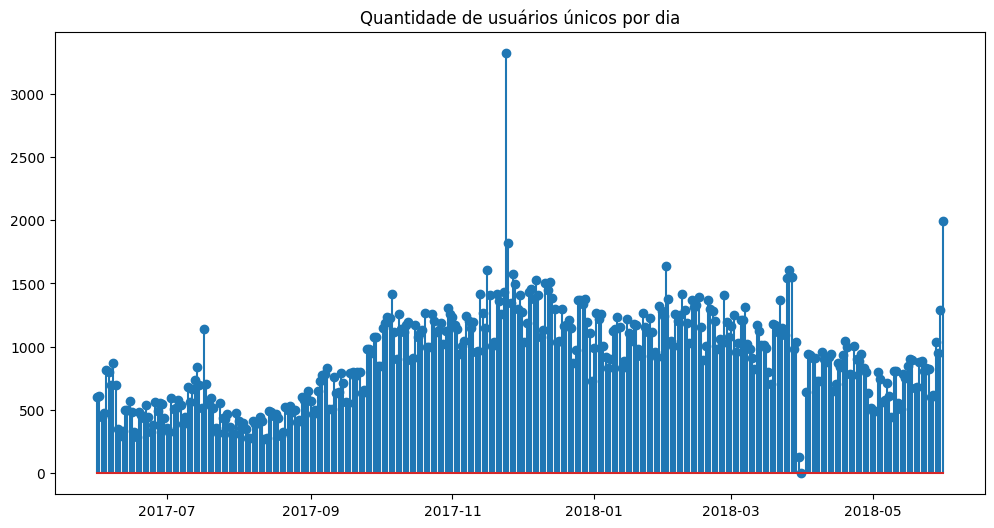

In [86]:
df = visits.groupby('day').agg({'uid':'nunique'}).reset_index()

plt.figure(figsize=(12, 6))
plt.stem(df['day'], df['uid'])
plt.title('Quantidade de usuários únicos por dia')
plt.show()

O gráfico se parece muito com o gráfico de acesso por dia, podemos tentar entender quantos acessos em media acontecem por dia e quantos usuários por dia acessam e comparar os dois valores. Provavelmente a razão entre essas médias deve ser próxima de 1.

In [114]:
users_per_day = visits.groupby('day').agg({'uid':'nunique'}).mean()
sessions_per_day = visits.groupby('day').agg({'uid':'count'}).mean()
print(f'O número médio de visitantes por dia no site é de {users_per_day.iloc[0].round().astype(int)} usuários\n')
print(f'O número médio de acessos por dia no site é de {sessions_per_day.iloc[0].round().astype(int)}.\n\n')
print( "A razão entre o numero de acessos e usuários por dia é de {:.2f}.\nO que nos leva a afirmar que, em média, os usuários não acessam mais que uma vez o aplicativo no mesmo dia.".format((sessions_per_day/users_per_day).iloc[0]))

print("\n\nCom base nessa conclusão e no fato de como o gráfico de acessos por dia se parece muito com o gráfico de usuarios únicos por dia, \npodemos extrapolar que o grafico mensal e semanal dos dois também terão comportanmento semelhante")

O número médio de visitantes por dia no site é de 908 usuários

O número médio de acessos por dia no site é de 987.


A razão entre o numero de acessos e usuários por dia é de 1.09.
O que nos leva a afirmar que, em média, os usuários não acessam mais que uma vez o aplicativo no mesmo dia.


Com base nessa conclusão e no fato de como o gráfico de acessos por dia se parece muito com o gráfico de usuarios unicos por dia, 
podemos extrapolar que o grafico mensal e semanal dos dois também terão comportanmento semelhante


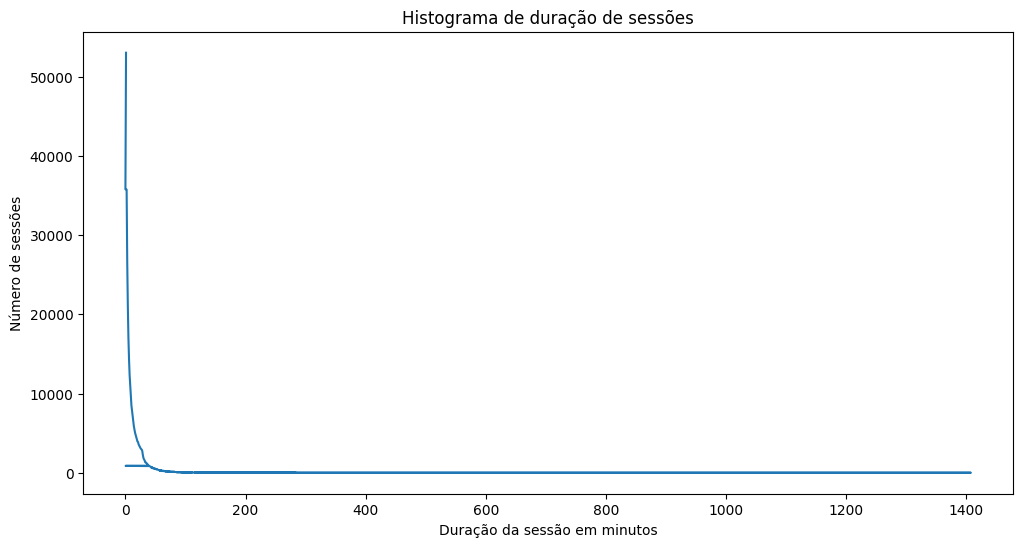

total_session
1.0    53029
0.0    35794
2.0    35748
3.0    26672
4.0    21085
5.0    17005
6.0    14316
7.0    12301
8.0    10973
9.0     9722
Name: count, dtype: int64


In [127]:
visits['total_session'].value_counts().plot( figsize=(12, 6))
plt.title("Histograma de duração de sessões")
plt.xlabel('Duração da sessão em minutos')
plt.ylabel('Número de sessões')
plt.show()
print(visits['total_session'].value_counts().head(10))

A curva exponencial apresenta que a imensa maioria das chamadas tem curta duração. Podemos focar em analisar apenas as sessões com mais expressividade.

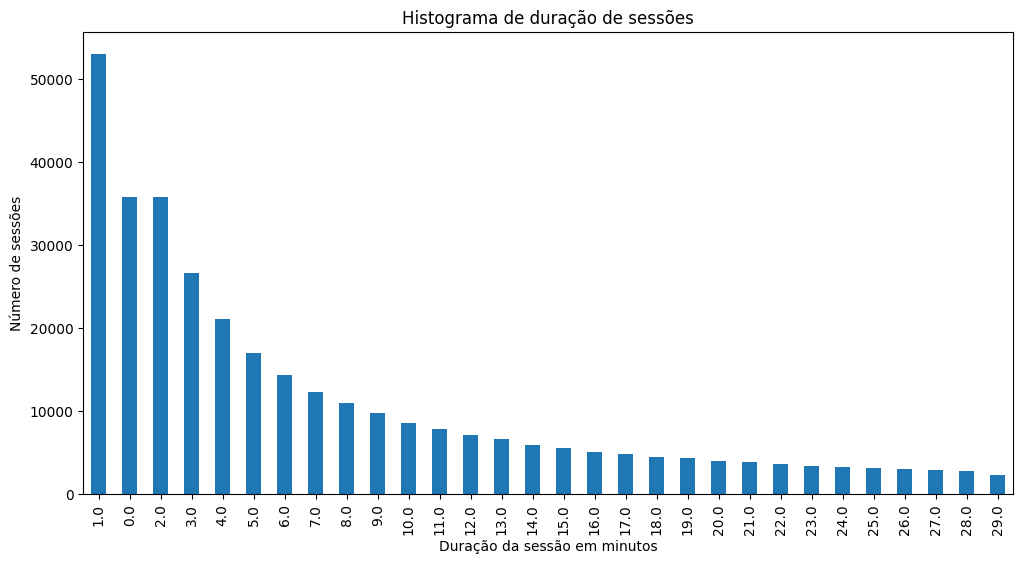

In [129]:
visits['total_session'].value_counts().head(30).plot(kind='bar',figsize=(12, 6))
plt.title("Histograma de duração de sessões")
plt.xlabel('Duração da sessão em minutos')
plt.ylabel('Número de sessões')
plt.show()